<a href="https://colab.research.google.com/github/MohamadRayi/MachineLearningTasks/blob/main/Task_Lecture_9_Mohamad_Rayi_Dwi_Putra_1103213070.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mohamad Rayi Dwi Putra

1103213070

Task Lecture 9 Neural Network

Housepricedata.csv


Dokumentasi PromptChatGPT:

https://chatgpt.com/share/cfca0f63-32b7-4331-bd18-0b1c60aa639d

**Import Modul **

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


**Menghubungkan Google Drive dan Membaca data Frame**

In [13]:
# Langkah 1: Hubungkan Google Drive ke Google Colab
from google.colab import drive
drive.mount('/content/drive')

# Langkah 2: Dapatkan path lengkap dari file dataset
file_path = '/content/drive/MyDrive/Dataset/housepricedata.csv'

# Langkah 3: Baca dataset menggunakan pandas
import pandas as pd
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari DataFrame
print(df.head())

# Memisahkan fitur dan target
X = df.drop('AboveMedianPrice', axis=1)
y = df['AboveMedianPrice']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   LotArea  OverallQual  OverallCond  TotalBsmtSF  FullBath  HalfBath  \
0     8450            7            5          856         2         1   
1     9600            6            8         1262         2         0   
2    11250            7            5          920         2         1   
3     9550            7            5          756         1         0   
4    14260            8            5         1145         2         1   

   BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageArea  AboveMedianPrice  
0             3             8           0         548                 1  
1             3             6           1         460                 1  
2             3             6           1         608                 1  
3             3             7           1         642                 0  
4             4             9           1         836         

**Normalisasi data:**

In [14]:
# Normalisasi fitur [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


**Membagi data menjadi train, validation, dan test set:**

In [15]:
# Membagi data menjadi 70% data train dan 30% data validation + test
X_train, X_val_test, y_train, y_val_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Membagi 30% data validation + test menjadi 50% validation dan 50% test
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)


**Membangun model neural network:**

In [16]:
# Membangun model neural network
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Mengkompilasi model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])


**Melatih Model**

In [17]:
# Melatih model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/100
32/32 [==============================] - 1s 9ms/step - loss: 0.6804 - accuracy: 0.5470 - val_loss: 0.6743 - val_accuracy: 0.5434
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6712 - accuracy: 0.5499 - val_loss: 0.6655 - val_accuracy: 0.5525
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6644 - accuracy: 0.5528 - val_loss: 0.6587 - val_accuracy: 0.5845
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6590 - accuracy: 0.5519 - val_loss: 0.6531 - val_accuracy: 0.6073
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6540 - accuracy: 0.5939 - val_loss: 0.6475 - val_accuracy: 0.6301
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6492 - accuracy: 0.6252 - val_loss: 0.6420 - val_accuracy: 0.6484
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6442 - accuracy: 0.6507 - val_loss: 0.6364 - val_accuracy: 0.6895
Epoch 8/100
3

**Visualisasi Loss dan Accuracy:**

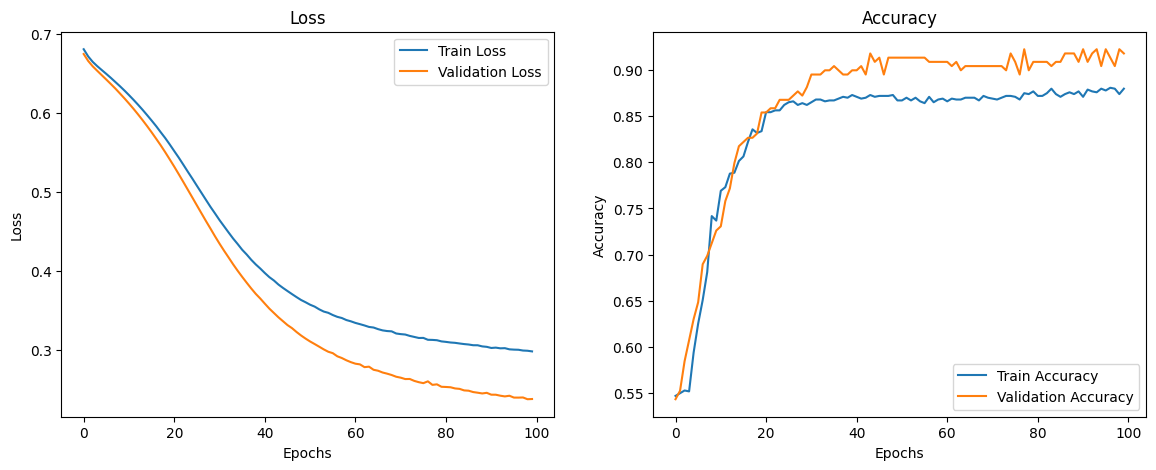

In [18]:
# Plotting Loss dan Accuracy
plt.figure(figsize=(14, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


**Evaluasi model pada test set:**

In [19]:
# Evaluasi model pada test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

7/7 [==============================] - 0s 3ms/step - loss: 0.2507 - accuracy: 0.9041
Test Loss: 0.2507055401802063
Test Accuracy: 0.9041095972061157
